# Cycling data: import .csv file and showing the data in graphs

N.B. for the last part of this notebook you will need an account/api key for openweather.org.

Convert your original fit file to csv using this website: http://garmin.stevegordon.co.uk/

In [1]:
#import the modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## 1. import the csv datafile

In [43]:
fietsdata=pd.read_csv('cycling_2020-04-19_07-39-11.csv')
fietsdata.head() # show first 5 records
#tfietsdata.tail(3) # show last three records

,timestamp,position_lat,position_long,distance,enhanced_altitude,altitude,enhanced_speed,power,speed,heart_rate,cadence,fractional_cadence,temperature
0,2020-04-19 09:39:12+02:00,52.35928290523589,4.86238838173449,0.0,-7.0,2465,18.702,202,18702.0,121,58,NaN,21
1,2020-04-19 09:39:13+02:00,52.35930126160383,4.86245677806437,0.01,-7.0,2465,17.294400000000003,147,17294.4,121,61,NaN,21
2,2020-04-19 09:39:14+02:00,52.35931785777211,4.862530035898089,0.01,-7.0,2465,18.9828,239,18982.8,122,64,NaN,21
3,2020-04-19 09:39:15+02:00,52.35934459604323,4.862605053931475,0.021,-7.0,2465,21.0924,193,21092.4,123,66,NaN,21
4,2020-04-19 09:39:16+02:00,52.35936957411468,4.86268007196486,0.021,-8.0,2460,19.908,210,19908.0,123,67,NaN,21


In [5]:
#fietsdata.columns = ['lat', 'long', 'count', 'distance', 'speed', 'heart', 'cadence', 'power', 'ele']

## 2. Do some standard analysis on the data

### 2a. Print the datatypes

In [44]:
print(fietsdata.dtypes)

timestamp              object
position_lat           object
position_long          object
distance               object
enhanced_altitude      object
altitude               object
enhanced_speed         object
power                  object
speed                  object
heart_rate             object
cadence                object
fractional_cadence    float64
temperature             int64
dtype: object


In [45]:
print(fietsdata.columns)

Index(['timestamp', 'position_lat', 'position_long', 'distance',
       'enhanced_altitude', 'altitude', 'enhanced_speed', 'power', 'speed',
       'heart_rate', 'cadence', 'fractional_cadence', 'temperature'],
      dtype='object')


In [39]:
import pandas as pd
position_lat = pd.to_numeric(['position_lat'], errors='ignore')

AttributeError: 'numpy.ndarray' object has no attribute 'dtypes'

## 3.Data cleansing and convert some columns

In [7]:
# The column names are too long, so we will change them to shorter names
#fietsdata.columns = ['lat', 'long', 'time', 'dist', 'speed', 'heart', 'cadence', 'power', 'ele']
#fietsdata.head()

In [8]:
# convert distance to kilometer
fietsdata['speed_kmh'] = fietsdata['speed'] *1.609344
fietsdata.head()

TypeError: can't multiply sequence by non-int of type 'float'

In [39]:
# replace wrong values with Not a Number

# use a dictionary for {column_name: value}, np.NaN)
fietsdata = fietsdata.replace({'power': 65535, 
                              'cadence':255,
                              'heart': 255},
                              np.NaN)


## 4. Show data in graph

### 4a basic graph

### 4b some more graphs

## 5. Show data on map

In [46]:
# We will use GeoPandas module. See my tutorial on maps for more info.

import geopandas as gpd

fiets_gpf = gpd.GeoDataFrame(fietsdata, geometry= gpd.points_from_xy(fietsdata['long'], fietsdata['lat']))
fiets_gpf.head()

,lat,long,time,dist,speed,heart,cadence,power,ele,geometry
0,52.359301,4.862457,2,0.01,10.7,121.0,61.0,147.0,-7,POINT (4.86246 52.35930)
1,52.359318,4.862530,3,0.01,11.8,122.0,64.0,239.0,-7,POINT (4.86253 52.35932)
2,52.359345,4.862605,4,0.01,13.1,123.0,66.0,193.0,-7,POINT (4.86261 52.35934)
3,52.359370,4.862680,5,0.01,12.4,123.0,67.0,210.0,-8,POINT (4.86268 52.35937)
4,52.359393,4.862755,6,0.02,12.5,124.0,69.0,252.0,-8,POINT (4.86276 52.35939)


<IPython.core.display.Javascript object>


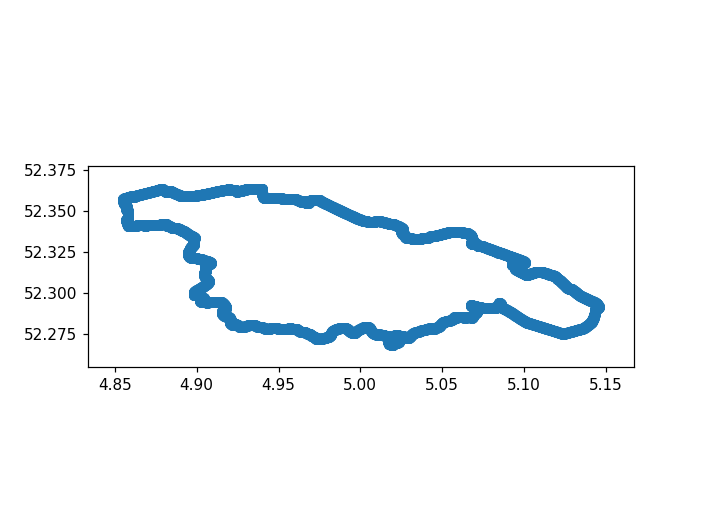

In [27]:
fiets_gpf.plot()
# Plot the x,y coordinates

## 6. Get the current weather data and wind data

Source and more information: https://openweathermap.org/current#geo

You will need an API-key for this website.

In [13]:
#get the startpoint of the ride. (=first lat and long) 
lat1 = fietsdata.lat.iloc[0] 
long1 = fietsdata.long.iloc[0]

#convert the dtype float64 datatype to an integer for step 5
lon_str = f'{long1}'
lat_str = f'{lat1}'
type(lat_str)

str

In [14]:
#see my Jupyter notebook on importing weather data from openweather.org

import requests
from pprint import pprint

##API key and base_url
#api.openweathe={lat}&lon={lon}&appid={your api key}rmap.org/data/2.5/weather?lat
API_key = "ac37f4337bdc07b0642d027ee1313660"

# This stores the base url
base_url = "http://api.openweathermap.org/data/2.5/weather?"

###get the coordinates of the first datapoint####

lat= lat_str #"52.1" #deze variabele moet een string zijn.
lon= lon_str #"4.862"

# This is final url. This is concatenation of base_url, API_key and city_id
Final_url = base_url + "lat=" + lat +"&lon=" + lon  + "&appid=" + API_key 
print(Final_url)
# this variable contain the JSON data which the API returns
weather_data = requests.get(Final_url).json()

# JSON data is difficult to visualize, so you need to pretty print 
#pprint(weather_data)
wind_dir = weather_data['wind']['deg'] 
wind_speed =weather_data['wind']['speed']
print(round(wind_speed,1)), print("m/s")
print(round(wind_dir,1))

#http://api.openweathermap.org/data/2.5/weather?lat=52&lon=4&appid=ac37f4337bdc07b0642d027ee1313660

http://api.openweathermap.org/data/2.5/weather?lat=52.3585979&lon=4.862353400000001&appid=ac37f4337bdc07b0642d027ee1313660
7.2
m/s
70
